# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Namira Nur Rifani
- **Email:** namiranurrifani@gmail.com
- **ID Dicoding:** namiranurr

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah terdapat hubungan antara Wind Speed dan konsentrasi polutan PM 2.5 pada stasiun Aotizhongxin?
- Pertanyaan 2: Bagaimana pengaruh atmospheric pressure (PRES) dan rainfall (RAIN) terhadap konsentrasi polutan PM2.5 pada stasiun Changping?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#membaca data dari Dataset stasiun Aotizhongxin
aotizhongxin_df = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
#membaca data dari Dataset stasiun Changping
changping_df = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Data menunjukkan bagaimana faktor cuaca seperti kecepatan angin dan curah hujan mempengaruhi polusi udara. Misalnya, kecepatan angin yang tinggi dapat membantu menyebarkan polutan seperti PM2.5, yang mengarah pada udara yang lebih bersih. Curah hujan juga dapat membersihkan partikel dari atmosfer, sehingga kualitas udara membaik saat kondisi hujan.
- Dengan membandingkan data dari dua lokasi yang berbeda (Aotizhongxin dan Changping), kita dapat menilai perbedaan tingkat polusi di berbagai area. Ini membantu memahami bagaimana kualitas udara berbeda di antara lokasi, yang mungkin disebabkan oleh banyak faktor.

### Assessing Data

**Menilai data aotizhongxin_df**

In [4]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Menilai data changping_df**

In [8]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- Hasil dari duplicated().sum() menunjukkan bahwa tidak ada duplikasi dalam dataset. Ini adalah kondisi yang baik karena memastikan bahwa setiap entri dalam dataset adalah unik dan tidak ada pengulangan data, yang bisa membingungkan dalam analisis.
- Dari kedua dataset memiliki kolom tahun, bulan, hari, dan jam, yang masing-masing menyimpan informasi waktu secara terpisah.

### Cleaning Data

In [12]:
print(aotizhongxin_df.columns)
print(changping_df.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [13]:
#menggabungkan kolom tahun, bulan, hari, dan jam menjadi satu kolom datetime untuk setiap dataset
for df in [aotizhongxin_df, changping_df]:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [14]:
#mengisi nilai yang hilang
columns_to_fill_median = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for df in [aotizhongxin_df, changping_df]:
    for column in columns_to_fill_median:
        df[column] = df[column].fillna(df[column].median())
    df['wd'] = df['wd'].fillna('Unknown')

In [15]:
# menghapus kolom yang tidak diperlukan
for df in [aotizhongxin_df, changping_df]:
    df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [16]:
aotizhongxin_df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [17]:
changping_df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


**Insight:**
- Dengan menggabungkan tahun, bulan, hari, dan jam menjadi satu kolom datetime, dataset telah ditingkatkan secara signifikan untuk analisis deret waktu. Transformasi ini memudahkan kueri dan visualisasi tren kualitas udara dari waktu ke waktu, memungkinkan pemantauan dan penilaian tingkat polusi yang lebih efektif.
- Pengisian nilai yang hilang dengan median untuk kolom numerik dan pengkategorian arah angin sebagai 'Unknown' meningkatkan kualitas keseluruhan dataset. Langkah ini mengurangi dampak data yang hilang pada analisis dan memastikan bahwa analisis berikutnya (seperti evaluasi statistik atau visualisasi) menghasilkan wawasan yang lebih akurat dan andal tentang pola kualitas udara.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
#gabungkan dataset dengan menggabungkan (concatenate) keduanya
df_combined = pd.concat([aotizhongxin_df, changping_df])

C:\Users\user\AppData\Local\Temp\ipykernel_22060\3876675549.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_pm25 = df_combined['PM2.5'].resample('M').mean()


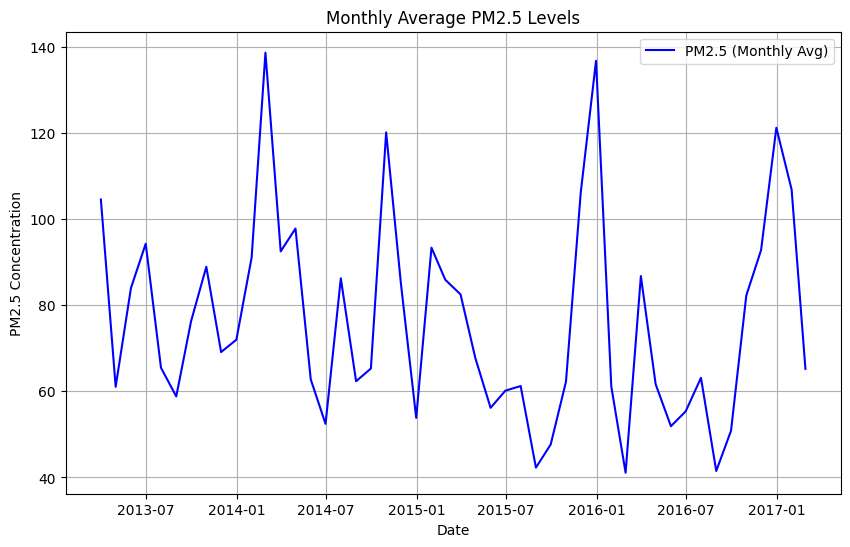

In [19]:
#plot tern bulanan untuk polutan PM2.5
df_combined.set_index('datetime', inplace=True)
monthly_avg_pm25 = df_combined['PM2.5'].resample('M').mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_avg_pm25, color='b', label='PM2.5 (Monthly Avg)')
plt.title('Monthly Average PM2.5 Levels')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.show() # tampilkan plot

In [20]:
#urutkan data gabungan berdasarkan tingkat PM2.5 untuk melihat 5 tingkat polusi tertinggi dan terendah
df_combined_sorted = df_combined.sort_values(by="PM2.5", ascending=False)

top_5 = df_combined_sorted[['station', 'PM2.5']].head()
bottom_5 = df_combined_sorted[['station', 'PM2.5']].tail()

print("5 Highest PM2.5 levels:", top_5)
print("\n5 Lowest PM2.5 levels:", bottom_5)

5 Highest PM2.5 levels:                           station  PM2.5
datetime                                
2016-02-08 02:00:00  Aotizhongxin  898.0
2016-02-08 02:00:00     Changping  882.0
2016-02-08 03:00:00  Aotizhongxin  713.0
2017-01-28 05:00:00  Aotizhongxin  713.0
2017-01-28 06:00:00  Aotizhongxin  697.0

5 Lowest PM2.5 levels:                           station  PM2.5
datetime                                
2013-10-29 16:00:00  Aotizhongxin    3.0
2017-01-06 13:00:00     Changping    3.0
2013-04-18 14:00:00     Changping    2.0
2013-06-10 21:00:00     Changping    2.0
2013-06-25 10:00:00     Changping    2.0


**Insight:**
- Dengan memplot rata-rata bulanan PM2.5, kita dapat melihat bagaimana tingkat polusi udara berubah seiring waktu.
- Dengan mengurutkan data, kita dapat mengidentifikasi 5 tingkat polusi tertinggi dan terendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: apakah terdapat hubungan antara Wind Speed dan konsentrasi polutan PM 2.5 pada stasiun Aotizhongxin?

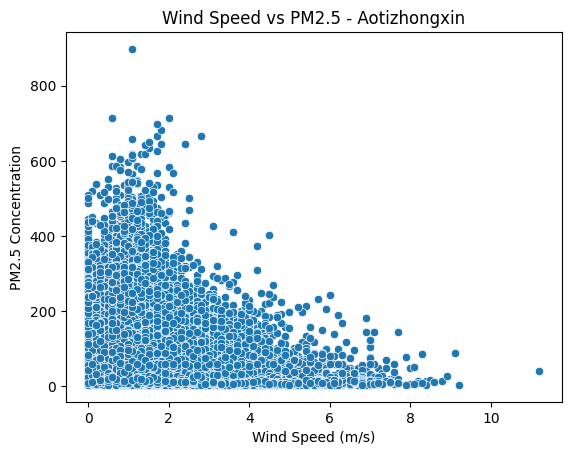

In [21]:
sns.scatterplot(x='WSPM', y='PM2.5', data=aotizhongxin_df)
plt.title('Wind Speed vs PM2.5 - Aotizhongxin')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration')
plt.show()

### Pertanyaan 2: bagaimana pengaruh atmospheric pressure (PRES) dan rainfall (RAIN) terhadap konsentrasi polutan PM2.5 pada stasiun Changping?

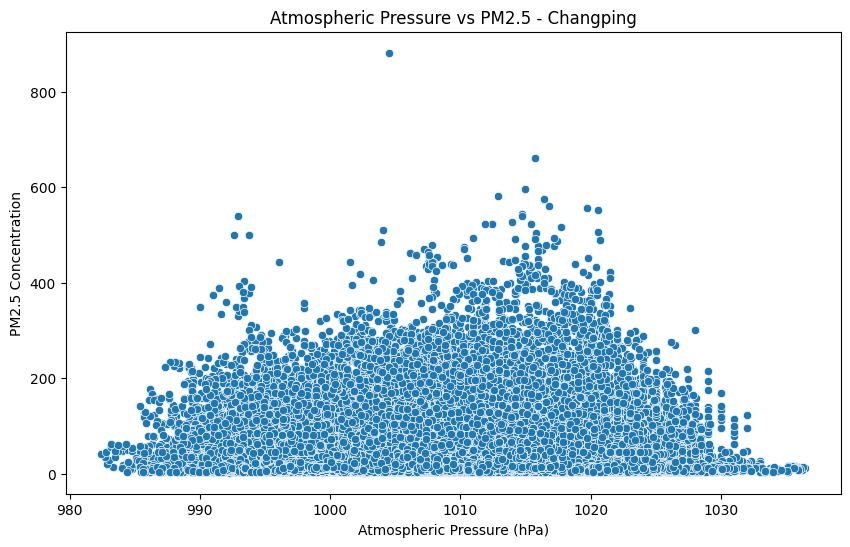

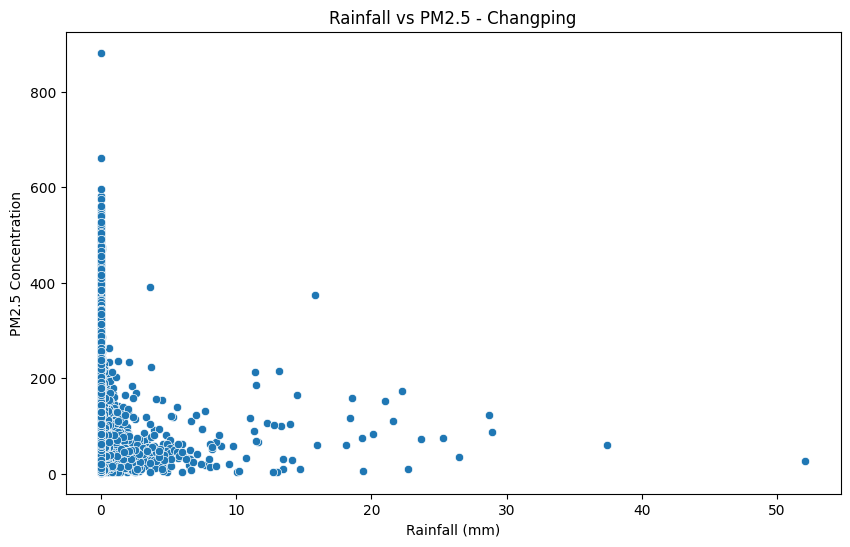

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRES', y='PM2.5', data=changping_df)
plt.title('Atmospheric Pressure vs PM2.5 - Changping')
plt.xlabel('Atmospheric Pressure (hPa)')
plt.ylabel('PM2.5 Concentration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=changping_df)
plt.title('Rainfall vs PM2.5 - Changping')
plt.xlabel('Rainfall (mm)')
plt.ylabel('PM2.5 Concentration')
plt.show()


## Conclusion

- Conclution pertanyaan 1: Kecepatan angin (WSPM) dapat mempengaruhi penyebaran polutan. Kecepatan angin yang lebih tinggi cenderung menyebarkan polusi udara, sehingga konsentrasi atau jumlah polutan per satuan volume udara bisa berkurang di area tertentu. Pada analisis pertanyaan 1 ini saya mengambil data dari stasiun Aotizhongxin.
- Conclution pertanyaan 2: Kondisi cuaca seperti tekanan atmosfer dan curah hujan dapat secara signifikan mempengaruhi kualitas udara. Misalnya, hujan dapat membersihkan polutan dari udara. Pada analisis pertanyaan 2 ini saya mengambil data dari stasiun Changping.

In [23]:
df_combined.to_csv('main_data.csv')